In [1]:
%autosave 60
#auto save this ipynb file every 60 seconds as checkpoints
%matplotlib inline  

Autosaving every 60 seconds


In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from sklearn import linear_model
from scipy import stats

# The empirical demand curve for a single session

### Input WTP data for student and non-student

In [36]:
# from excel where we generate the max WTP over all time slots for each client
df = pd.read_clipboard(header=None) 
numpyMatrix = df.as_matrix()
wtp_student = numpyMatrix
wtp_student = wtp_student.T # was a column in excel
wtp_student = wtp_student[0] # array([[ 75,...,25]])
wtp_student

array([ 25,  25,  25,  25,  25,  25,  25,  25,  50,  50,  50,  50,  50,
        50,  50,  50,  50,  50,  75,  75,  75,  75,  75,  75,  75,  75,
        75,  75,  75,  75,  75, 100, 125])

In [98]:
# from excel where we generate the max WTP over all time slots for each client
df = pd.read_clipboard(header=None) 
numpyMatrix = df.as_matrix()
wtp_nonstudent = numpyMatrix
wtp_nonstudent = wtp_nonstudent.T # was a column in excel
wtp_nonstudent = wtp_nonstudent[0] # array([[ 75,...,25]])
wtp_nonstudent

array([ 75,  50,  75,  75, 100, 100,  50, 150,  25, 125, 125,  25,  50,
        75, 100,  50, 125, 100,  25,  75, 100,  50,  75,  50,  75,  50,
       100,  75, 100,  75,  50,  25,  50, 125, 100,  25,  75, 100,  75,
       100, 100,  50,  75,  75,  50,  75,  75,  50,  25, 100, 125,  50,
       125,  75, 125,  75,  25,  75,  75,  75, 100,  25, 100, 100, 100,
       100,  75, 100, 100,  75, 125,  75,  75,  50,  75,  75,  75, 100,
        50, 100])

### Plot demand curves

In [121]:
def array_reserve(x):
        temp=[]
        for index in range(len(x)-1,0-1,-1):
            temp.append(x[index])
        return np.array(temp)

def wtp_binning(data):
    # Choose how many bins (defiend by num_bins or bin-edgs sequence inluding the rightmost)
    seq_bins = np.arange(min(data)-1,max(data)+2,1) # +1 for range doesn't include right threshold & +1 for rightmost value set as max+1 (https://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.histogram.html)
        # gap is defined as integer gap, and here one integer occurance is regarded as one bin --- bin_edges is [,) 

    # Use the histogram function to bin the data
    counts, bin_edges = np.histogram(data, bins=seq_bins, normed=True)
        # norm: If False, the result will contain the number of samples in each bin. 
            # If True, the result is the value of the probability density function at the bin, normalized such that the integral over the range is 1
        # print(counts) #  [0.  0.24242424  0. ... 0.03030303.]   len=102
        # print(bin_edges) # [24. 25. 26. ... 126.]    len=103
    # print("original bin_counts\n",counts)

    # Now find the reserved_cdf = 1-p(X<x)
        # for each price p, the fraction of people who would buy at price p or higher rather than lower  
    reserved_counts = array_reserve(counts) 
    sum_from_right = np.cumsum(reserved_counts) 
        # np.cumsum: Return the cumulative sum of the elements along a given axis. (https://docs.scipy.org/doc/numpy/reference/generated/numpy.cumsum.html)
            # 1,2,3 -> 1,3,6
    # print("sum_from_right\n",sum_from_right)


    reserved_cdf = array_reserve(sum_from_right)
    # print("reserved_cdf\n",reserved_cdf)


    # hope the proportion to buy drops to 0 rather than 0.03
    temp=list(reserved_cdf)
    temp.append(0)
    reserved_cdf_full = np.array(temp)
    # print(reserved_cdf_full)
    # print(len(reserved_cdf_full)) # 103

    x_data = bin_edges
    y_data = reserved_cdf_full 
    
    result =[]
    result.append(x_data)
    result.append(y_data)
    return result


def demand_line_plot(demand_line_data,plot_name):
    x_data= wtp_binning(demand_line_data)[0]
    y_data= wtp_binning(demand_line_data)[1]
    # And finally plot the demand curve
    # line plot
    plt.plot(x_data,y_data)
    plt.title(plot_name)
    plt.xlabel('Price($)')
    plt.ylabel('Probabilty to buy(%)')
    plt.grid(True)
    plt.show()

# demand_line_plot(wtp_student,'WTP curve for student')
# demand_line_plot(wtp_nonstudent,'WTP curve for nonstudent')

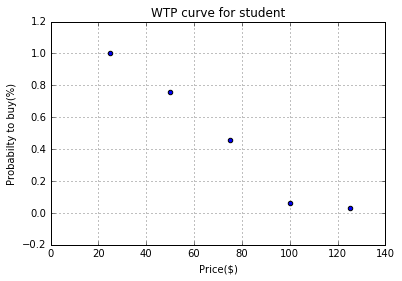

[[25, 50, 75, 100, 125],
 [1.0,
  0.75757575757575757,
  0.45454545454545453,
  0.060606060606060608,
  0.030303030303030304]]

In [126]:
def demand_scatter_plot(demand_scatter_data,plot_name):
    
    reserved_cdf_full = wtp_binning(demand_scatter_data)[1]
    bin_edges = wtp_binning(demand_scatter_data)[0]
    
    data = demand_scatter_data
    # hope to get rid of influence of missing values like 26,27,... due to pricing gap 
    # - this is a special case for integer price 

    # use dictionary to find unique values in the data 
    # - if price is not always integer, we should compare data points and all bin_edges and see where to put that points
    unique={}
    for item in data:
        if item in unique:
            unique[item] += 1
        else: unique[item] = 1

    # use dictionary to query
    dict={}
    for i in range(len(reserved_cdf_full)):
        dict[bin_edges[i]] = reserved_cdf_full[i]

    x_data=[]
    y_data=[]
    for item in dict:
        if item in data:
            x_data.append(item)
            y_data.append(dict[item] )

    if __name__ == '__main__' :
        # scatter plot
        plt.scatter(x_data,y_data)
        plt.title(plot_name)
        plt.xlabel('Price($)')
        plt.ylabel('Probabilty to buy(%)')
        plt.grid(True)
        plt.show()
    
    result=[]
    result.append(x_data)
    result.append(y_data)
    return result
    

demand_scatter_plot(wtp_student,'WTP curve for student')

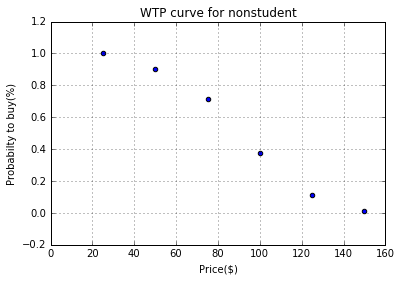

[[25, 50, 75, 100, 125, 150],
 [1.0,
  0.90000000000000002,
  0.71250000000000002,
  0.375,
  0.1125,
  0.012500000000000001]]

In [127]:
demand_scatter_plot(wtp_nonstudent,'WTP curve for nonstudent')

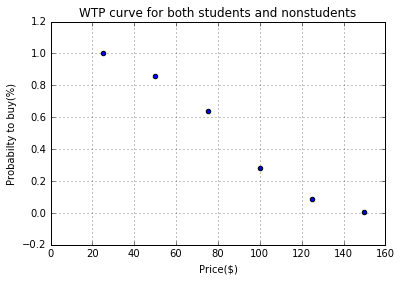

[25, 50, 75, 100, 125, 150]
[1.0, 0.8584070796460177, 0.63716814159292035, 0.2831858407079646, 0.088495575221238937, 0.0088495575221238937]


In [132]:
wtp_all=[]
for item in list(wtp_student):
    wtp_all.append(item)
for item in list(wtp_nonstudent):
    wtp_all.append(item)
# print(len(wtp_all),len(wtp_student),len(wtp_nonstudent)) # 113 33 80


temp = demand_scatter_plot(wtp_all,'WTP curve for both students and nonstudents')

price_set = temp[0]
prob_set = temp[1]
print(price_set)
print(prob_set)
# demand_scatter_plot(wtp_all,'WTP curve for both students and nonstudents')

??? name=main doesn't work for cells

###  Find optimal flat-price by maxing revenue 
###  -nonparametric (aggregated date of students and non-students) 

In [149]:
wtp={} # wtp[price]=demand 

for i in range(len(price_set)):
    wtp[price_set[i]]=prob_set[i]

def optimal_flat_price(wtp_data):    
    max_revenue = 0
    optimal_price = 0
    revenue={}
    for item in wtp_data:
        revenue[item]=wtp_data[item]*item
    for item in revenue:
        if max_revenue < revenue[item]:
            max_revenue = revenue[item]
            optimal_price = item
    result=[]
    result.append(max_revenue)
    result.append(optimal_price)
    return result

print("When the willingness to pay curve is:")
print(wtp)
print("the optimal flat price is ",optimal_flat_price (wtp)[1])
print("and the corresponding maximum revenue is", optimal_flat_price (wtp)[0])

When the willingness to pay curve is:
{50: 0.8584070796460177, 100: 0.2831858407079646, 150: 0.0088495575221238937, 25: 1.0, 75: 0.63716814159292035, 125: 0.088495575221238937}
the optimal flat price is  75
and the corresponding maximum revenue is 47.7876106195


###  Find optimal flat-price by maxing revenue 
###  -parametric (fitting wtp curve by linear regression) 

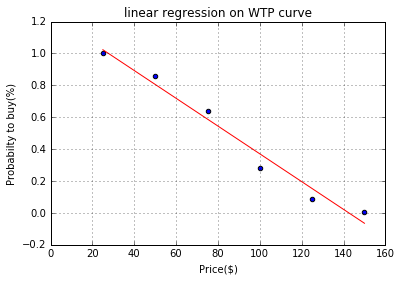

slope= -0.00870796460177 intercept= 1.2412979351
r-squared: 0.973119745164
residual_std_error 0.0756796719364


In [161]:
x = np.array(price_set)
y = np.array(prob_set)

# fit the model
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

# Calculate some additional outputs
predict_y = intercept + slope * x
pred_error = y - predict_y
degrees_of_freedom = len(x) - 2
residual_std_error = np.sqrt(np.sum(pred_error**2) / degrees_of_freedom)

# Plotting
if __name__ == '__main__' :
    # scatter plot
    plt.scatter(x,y)
    plt.plot(x, predict_y, c='r')
    plt.title("linear regression on WTP curve")
    plt.xlabel('Price($)')
    plt.ylabel('Probabilty to buy(%)')
    plt.grid(True)
    plt.show()

plt.show()

print("slope=",slope, "intercept=",intercept)
print ("r-squared:", r_value**2)
print("residual_std_error",residual_std_error)

In [170]:
wtp={} # wtp[price]=demand 
temp = range(   100*min(wtp_all)-1   ,   100*max(wtp_all)+2     )
price = list(temp)
price = np.array(price)/100

predict_prob = intercept + slope * price

for i in range(len(price)):
    wtp[price[i]]=predict_prob[i]

print("When the willingness to pay curve is:")
print("linear with", "slope=",slope, "intercept=",intercept)
print("the optimal flat price is ",optimal_flat_price (wtp)[1])
print("and the corresponding maximum revenue is", optimal_flat_price (wtp)[0])

When the willingness to pay curve is:
linear with slope= -0.00870796460177 intercept= 1.2412979351
the optimal flat price is  71.27
and the corresponding maximum revenue is 44.2359561038


In [166]:
a = range(min(wtp_all)-1,max(wtp_all)+2,0.05)
a

TypeError: 'float' object cannot be interpreted as an integer

not sure what's wrong with the dataset 
maybe sklean dataset transformation is needed...
http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html

In [154]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets - there is no testing/prediction needed here
regr.fit(price_set, prob_set)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((regr.predict(price_set) - prob_set) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(price_set, prob_set))

# Plot outputs
plt.scatter(price_set, prob_set,  color='black')
plt.plot(price_set, regr.predict(price_set), color='blue',
         linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

/Users/Jessie/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


ValueError: Found arrays with inconsistent numbers of samples: [1 6]